In [1]:
import pandas as pd
import sklearn

In [2]:
money = pd.read_csv("curs.csv", delimiter=";",)
money

,nominal,data,curs,cdx
0,1,01.01.2016,72.9299,Доллар США
1,1,12.01.2016,75.9507,Доллар США
2,1,13.01.2016,76.6041,Доллар США
3,1,14.01.2016,76.4275,Доллар США
4,1,15.01.2016,76.5230,Доллар США
...,...,...,...,...
941,1,25.10.2019,63.8600,Доллар США
942,1,26.10.2019,63.9966,Доллар США
943,1,29.10.2019,63.8700,Доллар США
944,1,30.10.2019,63.8320,Доллар США


In [3]:
def ctd(s):
    return float(s.replace(",", "."))

In [4]:
money["curs"]

0      72.9299
1      75.9507
2      76.6041
3      76.4275
4      76.5230
        ...   
941    63.8600
942    63.9966
943    63.8700
944    63.8320
945    63.8734
Name: curs, Length: 946, dtype: float64

In [5]:
values = money["curs"]

In [6]:
past = 7 * 4
future = 7

In [7]:
start = past
end = len(values) - future
print(start, end)

28 939


In [8]:
raw_df = []
for i in range(start, end):
    past_and_future_values = values[(i-past):(i+future)]
    raw_df.append(list(past_and_future_values))

In [9]:
past_columns = [f"past_{i}" for i in range(past)]

In [10]:
future_columns = [f"future_{i}" for i in range(future)]

In [11]:
df = pd.DataFrame(raw_df, columns=(past_columns+future_columns))

In [12]:
X = df[past_columns][:-1]
Y = df[future_columns][:-1]

In [13]:
X_test = df[past_columns][-1:]
Y_test = df[future_columns][-1:]

In [14]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [15]:
LinReg = LinearRegression()

In [16]:
LinReg.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [17]:
prediction = LinReg.predict(X_test)

In [18]:
prediction

array([[63.90229154, 63.87462141, 63.84695883, 63.93915612, 63.93692321,
        63.95379212, 63.8847385 ]])

[]

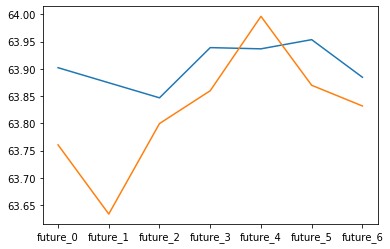

In [19]:
plt.plot(prediction[0], label="prediction")
plt.plot(Y_test.iloc[0], label="real")
plt.plot()

In [20]:
from sklearn.metrics import mean_absolute_error

In [21]:
mean_absolute_error(Y_test, prediction)

0.10076218757688744

In [22]:
from sklearn.neural_network import MLPRegressor

In [23]:
MLP = MLPRegressor(max_iter=400)

In [24]:
MLP.fit(X,Y)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(100,), learning_rate='constant',
             learning_rate_init=0.001, max_iter=400, momentum=0.9,
             n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
             random_state=None, shuffle=True, solver='adam', tol=0.0001,
             validation_fraction=0.1, verbose=False, warm_start=False)

[]

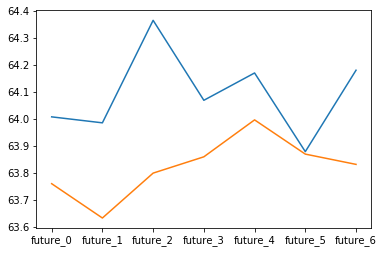

In [25]:
prediction = MLP.predict(X_test)
plt.plot(prediction[0], label="prediction")
plt.plot(Y_test.iloc[0], label="real")
plt.plot()

In [26]:
mean_absolute_error(Y_test, prediction)

0.27209074773892794